In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_customers_dataset.csv', sep=',' )
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_orders_dataset.csv', sep=',' )
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_products_dataset.csv', sep=',' )
sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_sellers_dataset.csv', sep=',' )
order_payment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_order_payments_dataset 2.csv', sep=',' )
category = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_category_name_translation.csv', sep=',' )
geolocation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_geolocation_dataset.csv', sep=',' )
order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/shopify_order_items_dataset.csv', sep=',' )


In [ ]:
customer.info()
customer.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [ ]:
order_items.info()
order_items.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [ ]:
category.info()
category.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,71
product_category_name_english,71


In [ ]:
geolocation.info()
geolocation.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27


In [ ]:
orders.info()
orders.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


**CALCULO DEL RFM**

In [ ]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
#eliminar columnas que tienen ordenes no entregadas
orders.dropna(subset=['order_delivered_customer_date', 'order_delivered_carrier_date', 'order_approved_at'], inplace=True)
#eliminar ordenes canceladas
orders.drop(orders[orders['order_status'] == 'canceled'].index, inplace=True)


In [ ]:
##con customer_unique_id tengo que hacer los análisis
##con customer_id hago el merge
orders_customer = pd.merge(orders, customer, on='customer_id', how='left')
orders_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
 8   customer_unique_id             96455 non-null  object
 9   customer_zip_code_prefix       96455 non-null  int64 
 10  customer_city                  96455 non-null  object
 11  customer_state                 96455 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.8+ MB


In [ ]:
orders_customer['order_purchase_timestamp'] = pd.to_datetime(orders_customer['order_purchase_timestamp'])
orders_customer.info()
orders_customer['order_purchase_timestamp'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  object        
 5   order_delivered_carrier_date   96455 non-null  object        
 6   order_delivered_customer_date  96455 non-null  object        
 7   order_estimated_delivery_date  96455 non-null  object        
 8   customer_unique_id             96455 non-null  object        
 9   customer_zip_code_prefix       96455 non-null  int64         
 10  customer_city                  96455 non-null  object        
 11  customer_state 

,order_purchase_timestamp
count,96455
mean,2018-01-02 00:26:23.673806336
min,2016-09-15 12:16:38
25%,2017-09-14 09:39:02.500000
50%,2018-01-20 20:00:12
75%,2018-05-05 18:53:33
max,2018-08-29 15:00:37


In [ ]:
orders_customer['last_order_date'] = orders_customer.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')
orders_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  object        
 5   order_delivered_carrier_date   96455 non-null  object        
 6   order_delivered_customer_date  96455 non-null  object        
 7   order_estimated_delivery_date  96455 non-null  object        
 8   customer_unique_id             96455 non-null  object        
 9   customer_zip_code_prefix       96455 non-null  int64         
 10  customer_city                  96455 non-null  object        
 11  customer_state 

In [ ]:
order_payment.info()
order_payment.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [ ]:
##agrupar order_id para sacar el valor de la compra total por factura
order_payment_total = order_payment.groupby('order_id')['payment_value'].sum().reset_index()
order_payment_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       99440 non-null  object 
 1   payment_value  99440 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
##unir tablas para tener orden, cliente, total de la orden
orders_customer_payment= pd.merge(orders_customer,order_payment_total , on='order_id', how='inner')
orders_customer_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96454 entries, 0 to 96453
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96454 non-null  object        
 1   customer_id                    96454 non-null  object        
 2   order_status                   96454 non-null  object        
 3   order_purchase_timestamp       96454 non-null  datetime64[ns]
 4   order_approved_at              96454 non-null  object        
 5   order_delivered_carrier_date   96454 non-null  object        
 6   order_delivered_customer_date  96454 non-null  object        
 7   order_estimated_delivery_date  96454 non-null  object        
 8   customer_unique_id             96454 non-null  object        
 9   customer_zip_code_prefix       96454 non-null  int64         
 10  customer_city                  96454 non-null  object        
 11  customer_state 

In [ ]:
##agrupar por customer_unique_id, contar la cantidad unica de ordenes, sumar los payment_value y asignar el last_order_date

In [ ]:
customer_orders_total = orders_customer_payment.groupby('customer_unique_id').agg({'order_id': 'nunique', 'payment_value': 'sum', 'last_order_date': 'max'}).reset_index()
customer_orders_total['recencia'] = (orders_customer_payment['order_purchase_timestamp'].max() - customer_orders_total['last_order_date']).dt.days
customer_orders_total.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93335 entries, 0 to 93334
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  93335 non-null  object        
 1   order_id            93335 non-null  int64         
 2   payment_value       93335 non-null  float64       
 3   last_order_date     93335 non-null  datetime64[ns]
 4   recencia            93335 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.6+ MB


In [ ]:
customer_orders_total.columns = ['customer_unique_id', 'frecuencia', 'monto', 'last_order_date','recencia']
customer_orders_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93335 entries, 0 to 93334
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  93335 non-null  object        
 1   frecuencia          93335 non-null  int64         
 2   monto               93335 non-null  float64       
 3   last_order_date     93335 non-null  datetime64[ns]
 4   recencia            93335 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.6+ MB


In [ ]:
customer_orders_total['R']= pd.qcut(customer_orders_total['recencia'], q=4)
customer_orders_total['F']= pd.qcut(customer_orders_total['frecuencia'], q=1)
customer_orders_total['M']= pd.qcut(customer_orders_total['monto'], q=4)
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]"
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]"
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]"
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]"
...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]"
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]"
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]"
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]"


In [ ]:
customer_orders_total['R_label']= pd.qcut(customer_orders_total['recencia'], q=4,labels=["4","3","2","1"])
customer_orders_total['F_label']= pd.qcut(customer_orders_total['frecuencia'], q=1,labels=["1"])
customer_orders_total['M_label']= pd.qcut(customer_orders_total['monto'], q=4,labels=["1","2","3","4"])
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4
...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3


In [ ]:
customer_orders_total['frecuencia'].unique()

#1 =1
#2-3 =2
#4-7 = 3
#9-15 = 4

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15])

In [ ]:
## Asignar la frecuencia en función de definición del negocio.
def categorizar_frecuencia(frecuencia):
  if frecuencia == 1:
    return 1
  elif 2 <= frecuencia <= 3:
    return 2
  elif 4 <= frecuencia <= 7:
    return 3
  elif 9 <= frecuencia <= 15:
    return 4
  else:
    return None

customer_orders_total['categoria_frecuencia'] = customer_orders_total['frecuencia'].apply(categorizar_frecuencia)
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1,1
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2,1
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3,1
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3,1


In [ ]:
customer_orders_total['RFM']=customer_orders_total['R_label'].astype(str)+customer_orders_total['categoria_frecuencia'].astype(str)+customer_orders_total['M_label'].astype(str)
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3,1,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1,1,311
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4,1,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2,1,212
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3,1,113
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3,1,313


In [ ]:
customer_orders_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93335 entries, 0 to 93334
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_unique_id    93335 non-null  object        
 1   frecuencia            93335 non-null  int64         
 2   monto                 93335 non-null  float64       
 3   last_order_date       93335 non-null  datetime64[ns]
 4   recencia              93335 non-null  int64         
 5   R                     93335 non-null  category      
 6   F                     93335 non-null  category      
 7   M                     93335 non-null  category      
 8   R_label               93335 non-null  category      
 9   F_label               93335 non-null  category      
 10  M_label               93335 non-null  category      
 11  categoria_frecuencia  93335 non-null  int64         
 12  RFM                   93335 non-null  object        
dtypes: category(6), 

In [ ]:
customer_orders_total.R_label = customer_orders_total.R_label.astype(int)
customer_orders_total.F_label = customer_orders_total.F_label.astype(int)
customer_orders_total.M_label = customer_orders_total.M_label.astype(int)

In [ ]:
##Definir la clasificación de los clientes en función de las combinaciones de R,F,M

In [ ]:
def clasificacion_cliente(row):
    r, f, m = row["R_label"], row["categoria_frecuencia"], row["M_label"]

    # Clientes TOP: alto en todo
    if r >= 3 and f >= 3 and m >= 3:
        return "Clientes TOP"

    # Potenciales: buena recencia y monto, frecuencia media/baja
    elif r >= 3 and f <= 2 and m >= 3:
        return "Clientes potenciales"

    # Recientes: recencia alta, F y M bajos/medios
    elif r == 4 and f <= 2 and m <= 2:
        return "Clientes recientes"

    # Alta frecuencia: frecuencia alta, R y M bajos/medios
    elif f == 4 and r <= 2 and m <= 2:
        return "Clientes alta frecuencia"

    # Monto alto: monto alto, R y F bajos/medios
    elif m == 4 and r <= 2 and f <= 2:
        return "Clientes monto alto"

    # Perdidos: muy baja recencia y F/M bajos
    elif r == 1 and f <= 2 and m <= 2:
        return "Clientes perdidos"

    # Nuevos de alto valor: recencia alta (4) y al menos un valor alto en F o M
    elif r == 4 and (f >= 3 or m >= 3):
        return "Clientes nuevos de alto valor"

    # Frecuencia moderada y monto alto: F=3, M≥3
    elif f == 3 and m >= 3:
        return "Clientes buenos gastadores"

    # Recencia moderada y frecuencia alta
    elif r >= 2 and f >= 3:
        return "Clientes recurrentes"

    # Si no entra en nada anterior
    else:
        return "Clientes intermedios"

In [ ]:
customer_orders_total['categoria_cliente'] = customer_orders_total.apply(clasificacion_cliente, axis=1)
customer_orders_total


,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia,RFM,categoria_cliente
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3,1,413,Clientes potenciales
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1,1,311,Clientes intermedios
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2,1,112,Clientes perdidos
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1,1,211,Clientes intermedios
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4,1,214,Clientes monto alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114,Clientes monto alto
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2,1,212,Clientes intermedios
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3,1,113,Clientes intermedios
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3,1,313,Clientes potenciales


In [ ]:
customer_orders_total['categoria_cliente'].value_counts()

,count
categoria_cliente,
Clientes intermedios,34556
Clientes potenciales,23879
Clientes perdidos,12059
Clientes monto alto,11407
Clientes recientes,11388
Clientes TOP,37
Clientes buenos gastadores,9


In [ ]:
customer_orders_total.to_excel('customer_orders_total.xlsx', index=False)

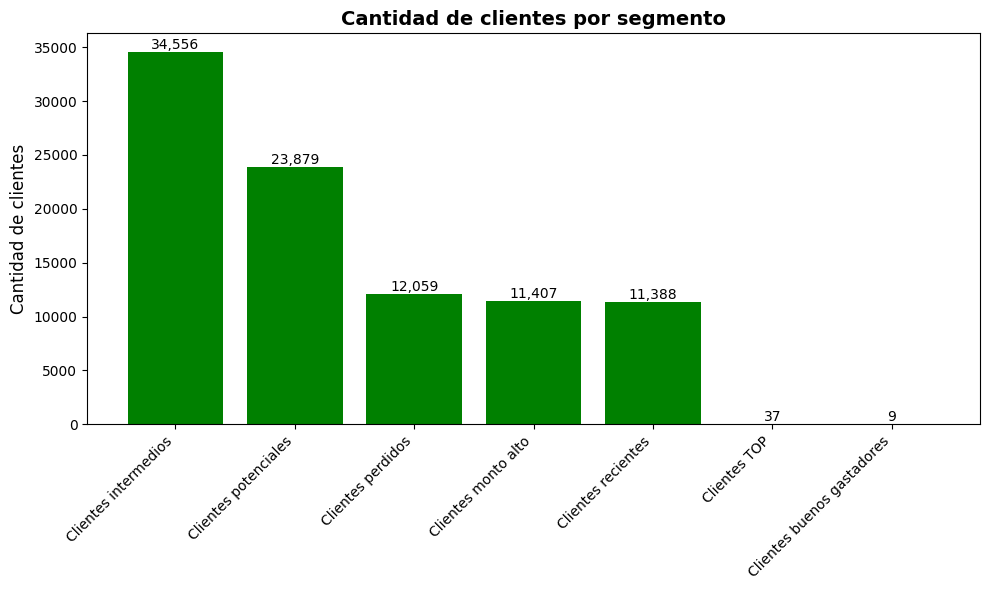

In [ ]:
# Conteo por categoría de cliente
conteo_segmentos = customer_orders_total["categoria_cliente"] \
    .value_counts() \
    .rename_axis("segmento") \
    .reset_index(name="cantidad")

# Crear gráfico
plt.figure(figsize=(10,6))
bars = plt.bar(conteo_segmentos["segmento"], conteo_segmentos["cantidad"], color="Green")

# Títulos y etiquetas
plt.title("Cantidad de clientes por segmento", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de clientes", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Agregar valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**ANALISIS DE CORRELACION**

In [ ]:
## Encontrar relación entre variables.

# Merge order_items and order_payment
order_items_payment = pd.merge(order_items, order_payment, on='order_id', how='left')

# Group by order_id and aggregate
order_aggregated = order_items_payment.groupby('order_id').agg(
    freight_value=('freight_value', 'sum'),
    product_count=('product_id', 'count'),
    payment_installments=('payment_installments', 'first')
).reset_index()

display(order_aggregated.head())

,order_id,freight_value,product_count,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1,2.0
1,00018f77f2f0320c557190d7a144bdd3,19.93,1,3.0
2,000229ec398224ef6ca0657da4fc703e,17.87,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.79,1,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1,3.0


In [ ]:
order_aggregated.iloc[:,1:].corr()

,freight_value,product_count,payment_installments
freight_value,1.000000,0.552657,0.145195
product_count,0.552657,1.000000,0.015745
payment_installments,0.145195,0.015745,1.000000


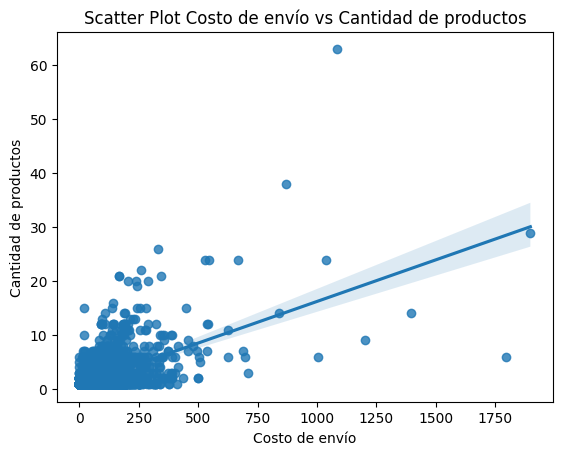

In [ ]:
sns.regplot(x='freight_value', y='product_count', data=order_aggregated)
plt.title('Scatter Plot Costo de envío vs Cantidad de productos')
plt.xlabel('Costo de envío')
plt.ylabel('Cantidad de productos')
plt.show()

#A mayor productos el costo de envío aumenta.

In [ ]:
correlation = order_aggregated['freight_value'].corr(order_aggregated['product_count'])
print(f"El coeficiente de correlación entre costo de envío y cantidad de productos es: {correlation}")

El coeficiente de correlación entre costo de envío y cantidad de productos es: 0.5526572419743132


**ANALISIS DESCRIPTIVO**

- **POR UBICACION**

In [ ]:
orders_customer_payment['customer_city'] = orders_customer_payment['customer_city'].str.title()

/tmp/ipython-input-1456792165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='payment_value', data=top_5_states, palette='viridis')


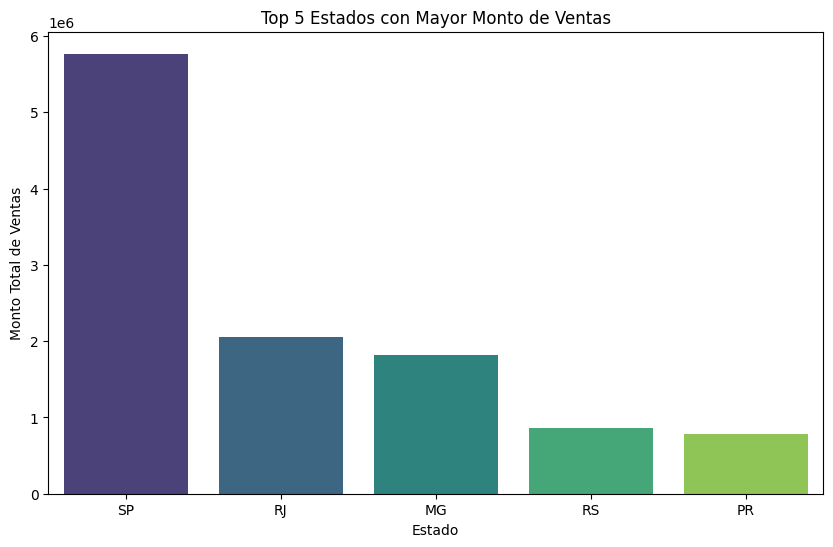

In [ ]:
#Top 5 de los estados con mayor monto en ventas

state_monto = orders_customer_payment.groupby('customer_state')['payment_value'].sum().reset_index()
top_5_states = state_monto.nlargest(5, 'payment_value')

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_state', y='payment_value', data=top_5_states, palette='viridis')
plt.title('Top 5 Estados con Mayor Monto de Ventas')
plt.xlabel('Estado')
plt.ylabel('Monto Total de Ventas')
plt.show()

/tmp/ipython-input-4008913897.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='payment_value', data=top_5_states, palette='viridis')


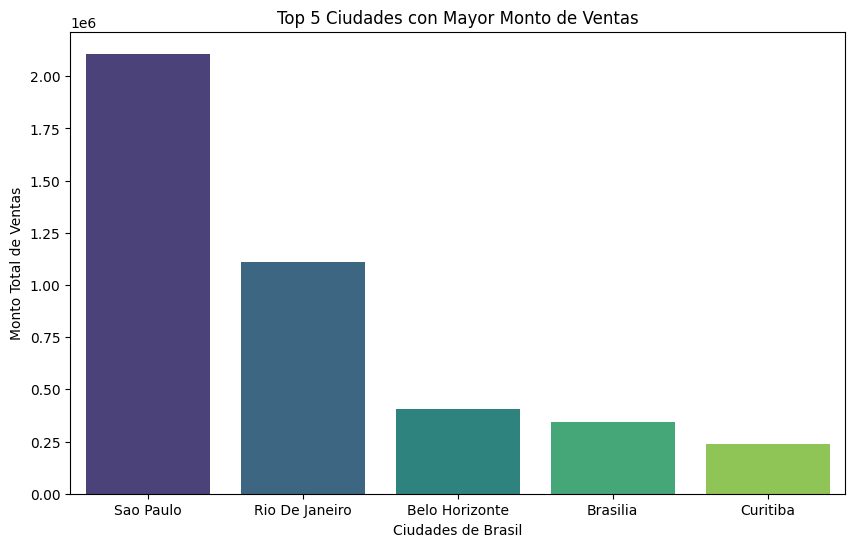

In [ ]:
#Top 5 de las ciudades con mayor monto en ventas

state_monto = orders_customer_payment.groupby('customer_city')['payment_value'].sum().reset_index()
top_5_states = state_monto.nlargest(5, 'payment_value')

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='payment_value', data=top_5_states, palette='viridis')
plt.title('Top 5 Ciudades con Mayor Monto de Ventas')
plt.xlabel('Ciudades de Brasil')
plt.ylabel('Monto Total de Ventas')
plt.show()

/tmp/ipython-input-866933113.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='payment_value', data=top_cities_sp, palette='viridis')


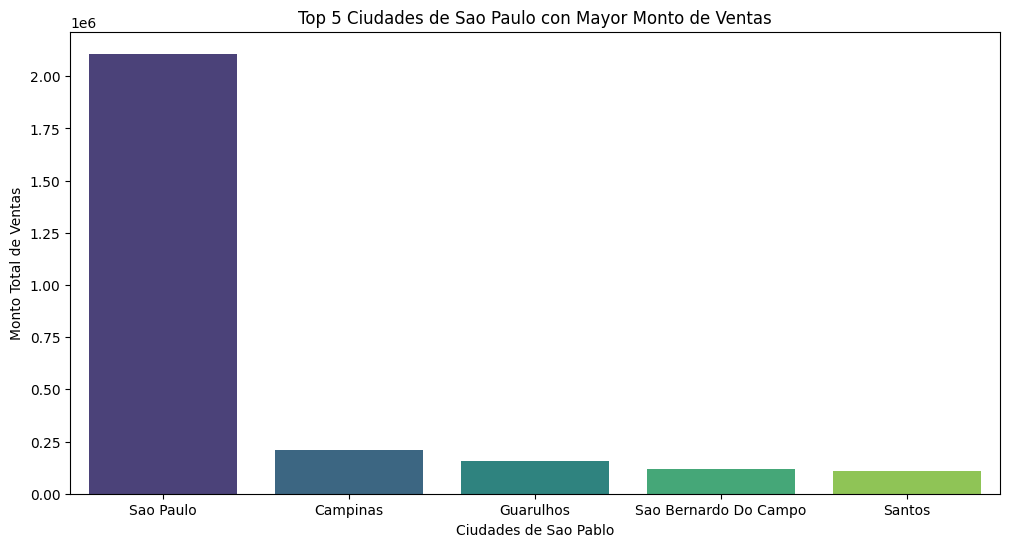

In [ ]:
# Ventas por ciudad del State SP
sp_orders = orders_customer_payment[orders_customer_payment['customer_state'] == 'SP']
city_monto_sp = sp_orders.groupby('customer_city')['payment_value'].sum().reset_index()
top_cities_sp = city_monto_sp.nlargest(5, 'payment_value')

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='payment_value', data=top_cities_sp, palette='viridis')
plt.title('Top 5 Ciudades de Sao Paulo con Mayor Monto de Ventas')
plt.xlabel('Ciudades de Sao Pablo')
plt.ylabel('Monto Total de Ventas')
plt.show()

/tmp/ipython-input-2972415560.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_cliente', y='count', data=category_counts_sp, palette='viridis')


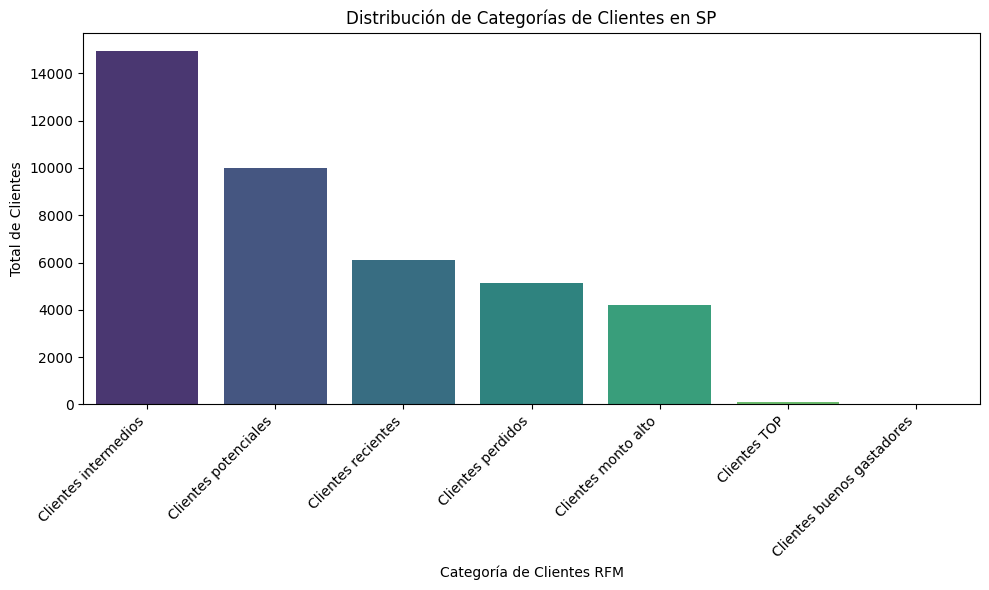

In [ ]:
# Categoria cliente por State SP

# Filtrar las ordenes por estado
sp_customer_orders = orders_customer_payment[orders_customer_payment['customer_state'] == 'SP']

# Unirlo con la tabla de categorias de clientes RFM
sp_customer_categories = pd.merge(sp_customer_orders, customer_orders_total[['customer_unique_id', 'categoria_cliente']], on='customer_unique_id', how='left')

# Contar la cantidad de clientes por categoria
category_counts_sp = sp_customer_categories['categoria_cliente'].value_counts().reset_index()
category_counts_sp.columns = ['categoria_cliente', 'count']

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria_cliente', y='count', data=category_counts_sp, palette='viridis')
plt.title('Distribución de Categorías de Clientes en SP')
plt.xlabel('Categoría de Clientes RFM')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1119079019.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_cliente', y='count', data=category_counts_sao_paulo, palette='viridis')


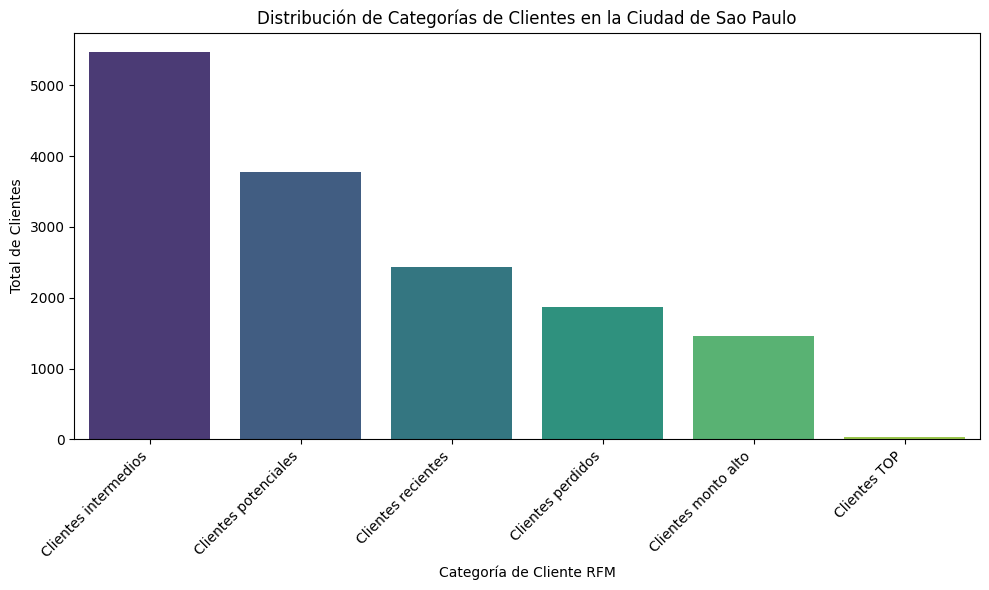

In [ ]:
# Categoria cliente por ciudad Sao Paulo

sao_paulo_customer_orders = orders_customer_payment[orders_customer_payment['customer_city'] == 'Sao Paulo']
sao_paulo_customer_categories = pd.merge(sao_paulo_customer_orders, customer_orders_total[['customer_unique_id', 'categoria_cliente']], on='customer_unique_id', how='left')

category_counts_sao_paulo = sao_paulo_customer_categories['categoria_cliente'].value_counts().reset_index()
category_counts_sao_paulo.columns = ['categoria_cliente', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='categoria_cliente', y='count', data=category_counts_sao_paulo, palette='viridis')
plt.title('Distribución de Categorías de Clientes en la Ciudad de Sao Paulo')
plt.xlabel('Categoría de Cliente RFM')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **POR PRODUCTO**

In [ ]:
category["product_category_name"] = category["product_category_name"].str.title()
category["product_category_name_english"] = category["product_category_name_english"].str.title()
category["product_category_name_english"] = category["product_category_name_english"].str.replace("_", " ")
products["product_category_name"] = products["product_category_name"].str.title()

/tmp/ipython-input-4133361627.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_categories, palette='summer')


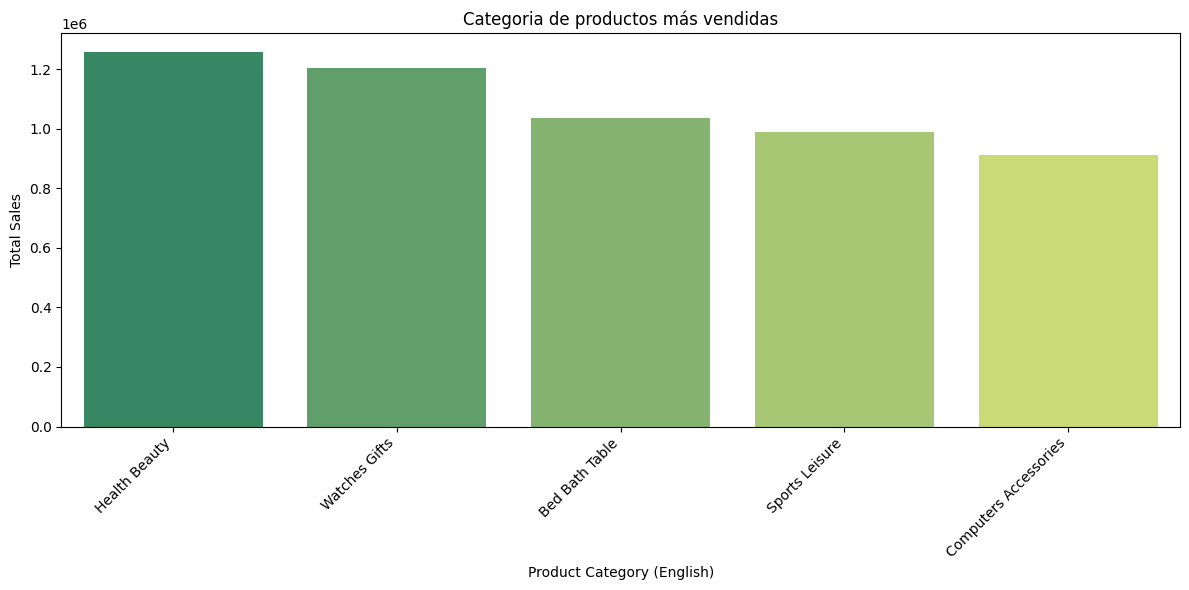

In [ ]:
## Top 5 de la categoría de productos más vendidos en total

# Combinar dataframes para obtener nombre de la categoría para cada ítem
order_items_with_product = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Combinar con nombres de categoría en inglés
order_items_with_english_category = pd.merge(order_items_with_product, category, on='product_category_name', how='left')

# Calcular ventas por categoría de producto
category_sales_english = order_items_with_english_category.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales_english.columns = ['product_category_name_english', 'total_sales']

# Identificar las 5 categorías más vendidas
top_5_categories = category_sales_english.nlargest(5, 'total_sales')

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_categories, palette='summer')
plt.title('Categoria de productos más vendidas')
plt.xlabel('Product Category (English)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Top 5 de los productos más vendidos en el estado de SP

#Crear dataframe con ventas en SP
sp_orders_customer_payment = orders_customer_payment[orders_customer_payment['customer_state'] == 'SP'].copy()
sp_orders_customer_payment.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_order_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,2017-10-02 10:56:33,38.71
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,Santo Andre,SP,2018-02-13 21:18:39,28.62
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,Sorocaba,SP,2017-07-29 11:55:02,169.76


In [ ]:
#Obtener el nombre del producto uniendo con Products
sp_order_items = sp_orders_customer_payment[['order_id', 'customer_unique_id']].drop_duplicates()
sp_order_items_with_product = pd.merge(order_items, sp_order_items, on='order_id', how='inner')
sp_order_items_with_product = pd.merge(sp_order_items_with_product, products[['product_id', 'product_category_name']], on='product_id', how='left')

#Unir para obtener los nombres de productos en ingles
sp_order_items_with_english_category = pd.merge(sp_order_items_with_product, category, on='product_category_name', how='left')


In [ ]:
#Agrupar los datos combinados por el ID del producto y nombre y calcular el monto total de ventas para cada producto en SP.
product_sales_sp = sp_order_items_with_english_category.groupby(['product_id', 'product_category_name_english'])['price'].sum().reset_index()
product_sales_sp.columns = ['product_id', 'product_category_name_english', 'total_sales']

#Identificar los 5 productos más vendidos en sp
top_5_selling_products_sp = product_sales_sp.sort_values(by='total_sales', ascending=False).head(5)
display(top_5_selling_products_sp)

,product_id,product_category_name_english,total_sales
13450,bb50f2e236e5eea0100680137654686c,Health Beauty,22280.00
11034,99a4788cb24856965c36a24e339b6058,Bed Bath Table,19862.78
12360,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture Decor,18835.70
15413,d6160fb7873f184099d9bc95e30376af,Computers,15499.66
6952,5f504b3a1c75b73d6151be81eb05bdc9,Cool Stuff,15059.30


/tmp/ipython-input-1180256937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sp, palette='summer')


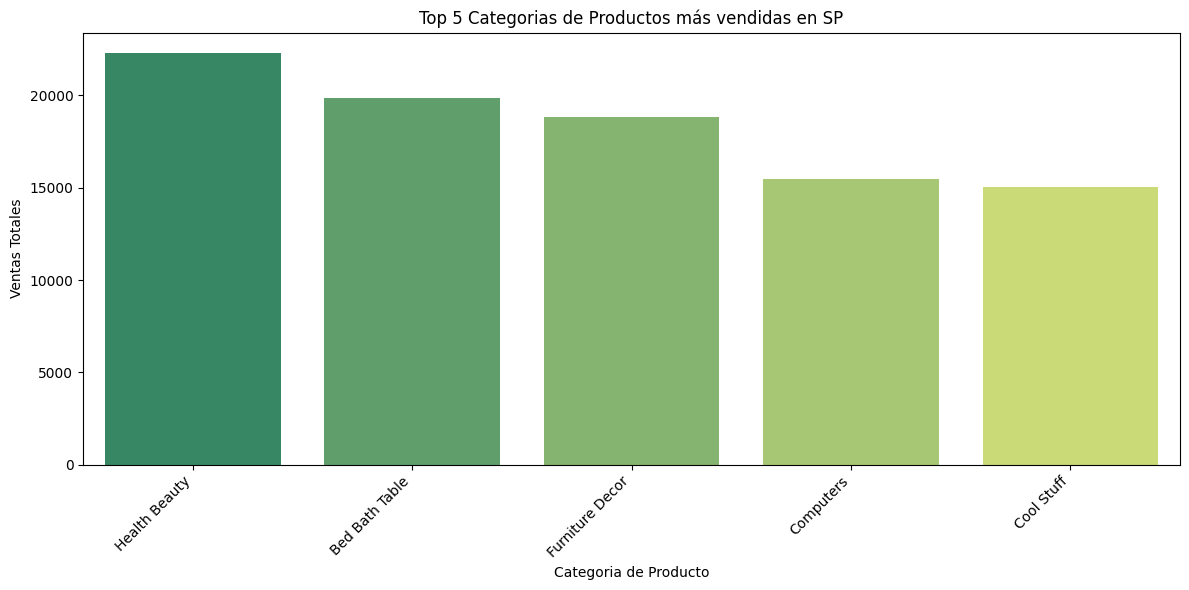

In [ ]:
#Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sp, palette='summer')
plt.title('Top 5 Categorias de Productos más vendidas en SP')
plt.xlabel('Categoria de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Top 5 de los productos más vendidos en Sao Paulo

#Crear dataframe con ventas en Sao Paulo
sao_paulo_orders_customer_payment = orders_customer_payment[orders_customer_payment['customer_city'] == 'Sao Paulo'].copy()
display(sao_paulo_orders_customer_payment.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_order_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,2017-10-02 10:56:33,38.71
10,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4278,Sao Paulo,SP,2017-07-13 19:58:11,114.13
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,e2dfa3127fedbbca9707b36304996dab,4812,Sao Paulo,SP,2018-07-25 17:44:10,32.70
13,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,04cf8185c71090d28baa4407b2e6d600,5271,Sao Paulo,SP,2018-03-01 14:14:28,54.36
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,d699688533772c15a061e8ce81cb56df,4001,Sao Paulo,SP,2017-09-18 14:31:30,118.86


In [ ]:
#Obtener el nombre del producto uniendo con Products
sao_paulo_order_items = sao_paulo_orders_customer_payment[['order_id', 'customer_unique_id']].drop_duplicates()
sao_paulo_order_items_with_product = pd.merge(order_items, sao_paulo_order_items, on='order_id', how='inner')
sao_paulo_order_items_with_product = pd.merge(sao_paulo_order_items_with_product, products[['product_id', 'product_category_name']], on='product_id', how='left')

#Unir para obtener los nombres de productos en ingles
sao_paulo_order_items_with_english_category = pd.merge(sao_paulo_order_items_with_product, category, on='product_category_name', how='left')

In [ ]:
#Agrupar los datos combinados por el ID del producto y nombre y calcular el monto total de ventas para cada producto en Sao Paulo
product_sales_sao_paulo = sao_paulo_order_items_with_english_category.groupby(['product_id', 'product_category_name_english'])['price'].sum().reset_index()
product_sales_sao_paulo.columns = ['product_id', 'product_category_name_english', 'total_sales']

#Identificar los 5 productos más vendidos en Sao Paulo
top_5_selling_products_sao_paulo = product_sales_sp.sort_values(by='total_sales', ascending=False).head(5)

/tmp/ipython-input-116187308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sao_paulo, palette='summer')


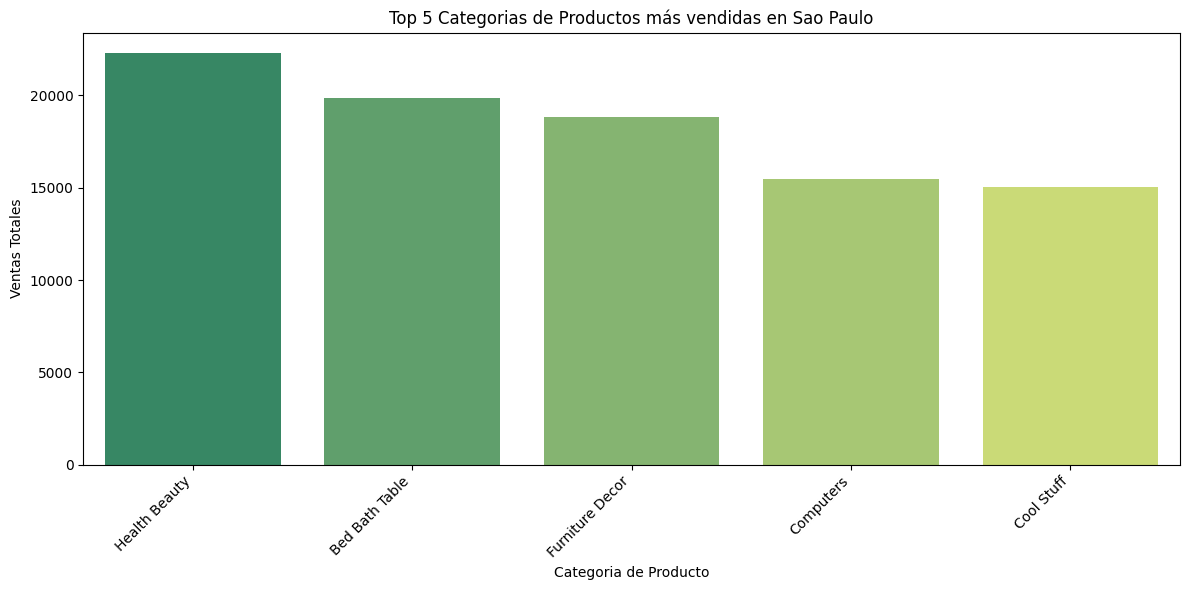

In [ ]:
#Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sao_paulo, palette='summer')
plt.title('Top 5 Categorias de Productos más vendidas en Sao Paulo')
plt.xlabel('Categoria de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Top 3 de los productos más comprados por clientes Potenciales - RFM

#Crear dataset unicamente de clientes Potenciales
potenciales_customers = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes potenciales'].copy()

#Combinar con órdenes y ítems de orden
potenciales_customer_orders = pd.merge(potenciales_customers[['customer_unique_id']], orders_customer_payment[['customer_unique_id', 'order_id']], on='customer_unique_id', how='inner')
potenciales_customer_order_items = pd.merge(potenciales_customer_orders, order_items, on='order_id', how='inner')

#Combinar con información de categorías de productos
potenciales_customer_product_categories = pd.merge(potenciales_customer_order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
potenciales_customer_product_categories = pd.merge(potenciales_customer_product_categories, category, on='product_category_name', how='left')
potenciales_customer_product_categories

,customer_unique_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.9,12.00,Cama_Mesa_Banho,Bed Bath Table
1,0004bd2a26a76fe21f786e4fbd80607f,3e470077b690ea3e3d501cffb5e0c499,1,25cf184645f3fae66083bf33581b8f13,ff063b022a9a0aab91bad2c9088760b7,2018-04-11 19:48:59,154.0,12.98,Ferramentas_Jardim,Garden Tools
2,00053a61a98854899e70ed204dd4bafe,44e608f2db00c74a1fe329de44416a4e,1,62984ea1bba7fcea1f5b57084d3bf885,218d46b86c1881d022bce9c68a7d4b15,2018-03-06 11:30:57,191.0,18.59,Esporte_Lazer,Sports Leisure
3,00053a61a98854899e70ed204dd4bafe,44e608f2db00c74a1fe329de44416a4e,2,58727e154e8e85d84052cd22b0136c84,218d46b86c1881d022bce9c68a7d4b15,2018-03-06 11:30:57,191.0,18.59,Esporte_Lazer,Sports Leisure
4,0005ef4cd20d2893f0d9fbd94d3c0d97,01b330808c5819a6a3cb79b72f0b8288,1,4fb3e6ce442ce9c621ea9509e47ac951,3c03b12bab54d8b37d79d914bfdb1aa0,2018-03-16 15:38:46,104.9,24.86,Esporte_Lazer,Sports Leisure
...,...,...,...,...,...,...,...,...,...,...
31156,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,3,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,Sinalizacao_E_Seguranca,Signaling And Security
31157,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,4,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,Sinalizacao_E_Seguranca,Signaling And Security
31158,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,5,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,Sinalizacao_E_Seguranca,Signaling And Security
31159,fff5eb4918b2bf4b2da476788d42051c,cf4659487be50c0c317cff3564c4a840,6,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,Sinalizacao_E_Seguranca,Signaling And Security


In [ ]:
#Contar la frecuencia de compra de cada categoría de producto por los Clientes Potenciales
potenciales_customer_category_counts = potenciales_customer_product_categories['product_category_name_english'].value_counts().reset_index()
potenciales_customer_category_counts.columns = ['product_category_name_english', 'count']

#Identificar las 3 categorías de productos más compradas
potenciales_3_top_customer_categories = potenciales_customer_category_counts.nlargest(3, 'count')
potenciales_3_top_customer_categories

,product_category_name_english,count
0,Bed Bath Table,3027
1,Health Beauty,2980
2,Watches Gifts,2552


/tmp/ipython-input-2558354186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=potenciales_3_top_customer_categories , palette='summer')


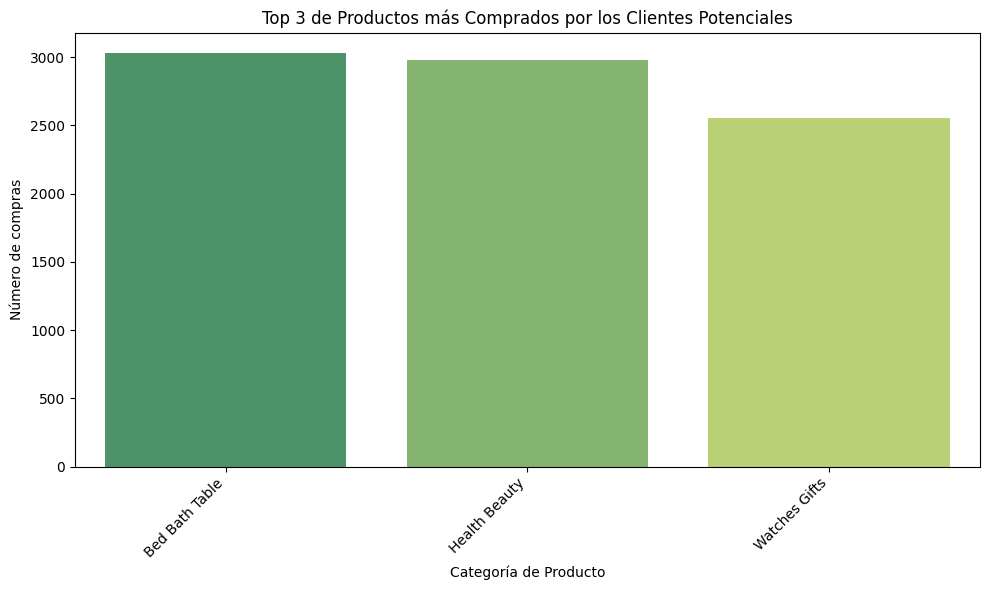

In [ ]:
#Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=potenciales_3_top_customer_categories , palette='summer')
plt.title('Top 3 de Productos más Comprados por los Clientes Potenciales')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1967347068.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=top_3_monto_alto_customer_categories, palette='summer')


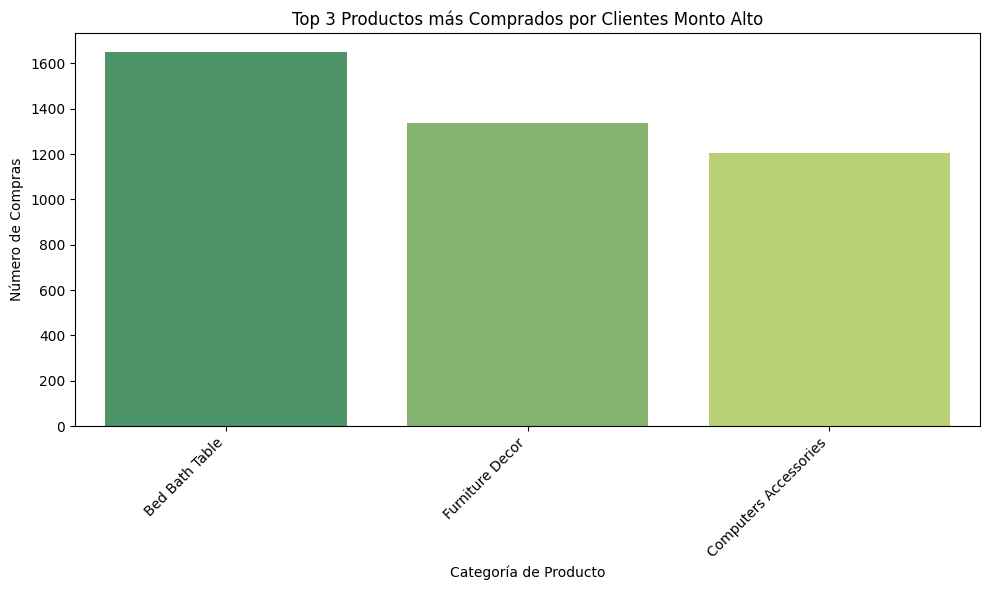

In [ ]:
# Top 3 de los productos más comprados por clientes Monto Alto - RFM
monto_alto_customers = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes monto alto'].copy()

monto_alto_customer_orders = pd.merge(monto_alto_customers[['customer_unique_id']], orders_customer_payment[['customer_unique_id', 'order_id']], on='customer_unique_id', how='inner')
monto_alto_customer_order_items = pd.merge(monto_alto_customer_orders, order_items, on='order_id', how='inner')

monto_alto_customer_product_categories = pd.merge(monto_alto_customer_order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
monto_alto_customer_product_categories = pd.merge(monto_alto_customer_product_categories, category, on='product_category_name', how='left')

monto_alto_customer_category_counts = monto_alto_customer_product_categories['product_category_name_english'].value_counts().reset_index()
monto_alto_customer_category_counts.columns = ['product_category_name_english', 'count']

top_3_monto_alto_customer_categories = monto_alto_customer_category_counts.nlargest(3, 'count')

plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=top_3_monto_alto_customer_categories, palette='summer')
plt.title('Top 3 Productos más Comprados por Clientes Monto Alto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()